# TASK 9.2
## Analiza danych na podstawie HRDataset

Odpowiedz na pytania:

    1. Czy istnieje zależność pomiędzy tym, kto jest bezpośrednim przełożonym (ManagerName, ManagerID) danego pracownika, a oceną wydajności pracy (PerformanceScore)?
    2. Jakie źródła pozyskania pracownika (Recruitment Source) są najlepsze, jeśli zależy nam na jak najdłuższym stażu pracowników?
    3. Czy stan cywilny (MartialDesc) pracownika koreluje w jakikolwiek sposób z zadowoleniem z pracy (EmpSatisfaction)?
    4. Jak wygląda struktura wieku aktualnie zatrudnionych pracowników?
    5. Czy starsi pracownicy pracują nad większą liczbą specjalnych projektów niż młodsi pracownicy?


In [95]:
# import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from scipy import stats
import math

In [2]:
# read data
df = pd.read_csv('HRDataset_9_2.csv')
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,NaN,NaN
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0


## 1.  Czy istnieje zależność pomiędzy tym, kto jest bezpośrednim przełożonym (ManagerName, ManagerID) danego pracownika, a oceną wydajności pracy (PerformanceScore)?

In [3]:
# PerformanceScore jest tekstem o następujących możliwych elementach
df['PerformanceScore'].unique()

array(['Fully Meets', 'PIP', 'Exceeds', 'Needs Improvement', nan],
      dtype=object)

In [4]:
# pozbywamy się wieszy, w których ocena pracownika jest nieuzupełniona
df1 = df[df['PerformanceScore'].notna()]
df1

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,NaN,NaN
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,"Daniele, Ann",1.411071e+09,1.0,1.0,0.0,3.0,3.0,3.0,0.0,54.10,...,IT/IS,Peter Monroe,7.0,Vendor Referral,Fully Meets,1.55,5.0,8.0,2/12/2019,0.0
306,"Lajiri, Jyoti",1.108028e+09,1.0,1.0,1.0,3.0,3.0,3.0,0.0,56.20,...,IT/IS,Peter Monroe,7.0,Employee Referral,Fully Meets,4.46,5.0,6.0,1/7/2019,0.0
307,"Semizoglou, Jeremiah",9.040136e+08,1.0,1.0,1.0,2.0,3.0,3.0,0.0,53.80,...,IT/IS,Peter Monroe,7.0,On-campus Recruiting,Fully Meets,3.27,4.0,5.0,1/14/2019,0.0
308,"South, Joe",1.308061e+09,0.0,0.0,1.0,1.0,3.0,3.0,0.0,53.00,...,IT/IS,Peter Monroe,7.0,Employee Referral,Fully Meets,5.00,3.0,4.0,1/2/2019,0.0


In [5]:
print(df1['PerformanceScore'].unique())
print(df1['ManagerID'].unique())

['Fully Meets' 'PIP' 'Exceeds' 'Needs Improvement']
[ 1. 17. 21. 13.  5.  2.  4.  6.  7.  9. 11. 12. 14. 16. 18. 19. 20. 22.
 39. nan 30. 15. 10.  3.]


In [6]:
performance_score_for_each_manager = df1.pivot_table(index = 'ManagerID', columns = 'PerformanceScore', aggfunc = 'count')['CitizenDesc']
performance_score_for_each_manager.fillna(0.0, inplace = True)
display(performance_score_for_each_manager.head())

PerformanceScore,Exceeds,Fully Meets,Needs Improvement,PIP
ManagerID,,,,
1.0,0.0,6.0,0.0,0.0
2.0,4.0,13.0,2.0,0.0
3.0,0.0,1.0,0.0,0.0
4.0,2.0,15.0,0.0,0.0
5.0,2.0,4.0,1.0,0.0


In [7]:
performance_score_for_each_manager.reset_index(inplace = True)
performance_score_for_each_manager.index.name = 'ID'
performance_score_for_each_manager.head()

PerformanceScore,ManagerID,Exceeds,Fully Meets,Needs Improvement,PIP
ID,,,,,
0,1.0,0.0,6.0,0.0,0.0
1,2.0,4.0,13.0,2.0,0.0
2,3.0,0.0,1.0,0.0,0.0
3,4.0,2.0,15.0,0.0,0.0
4,5.0,2.0,4.0,1.0,0.0


In [8]:
count_exceeds = performance_score_for_each_manager['Exceeds'].sum()
count_fully_meets = performance_score_for_each_manager['Fully Meets'].sum()
count_needs_improvement = performance_score_for_each_manager['Needs Improvement'].sum()
count_pip = performance_score_for_each_manager['PIP'].sum()
print(f"Exceeds = {count_exceeds}, Fully Meets = {count_fully_meets}, Needs Improvement = {count_needs_improvement}, PIP = {count_pip}")

Exceeds = 36.0, Fully Meets = 236.0, Needs Improvement = 18.0, PIP = 12.0


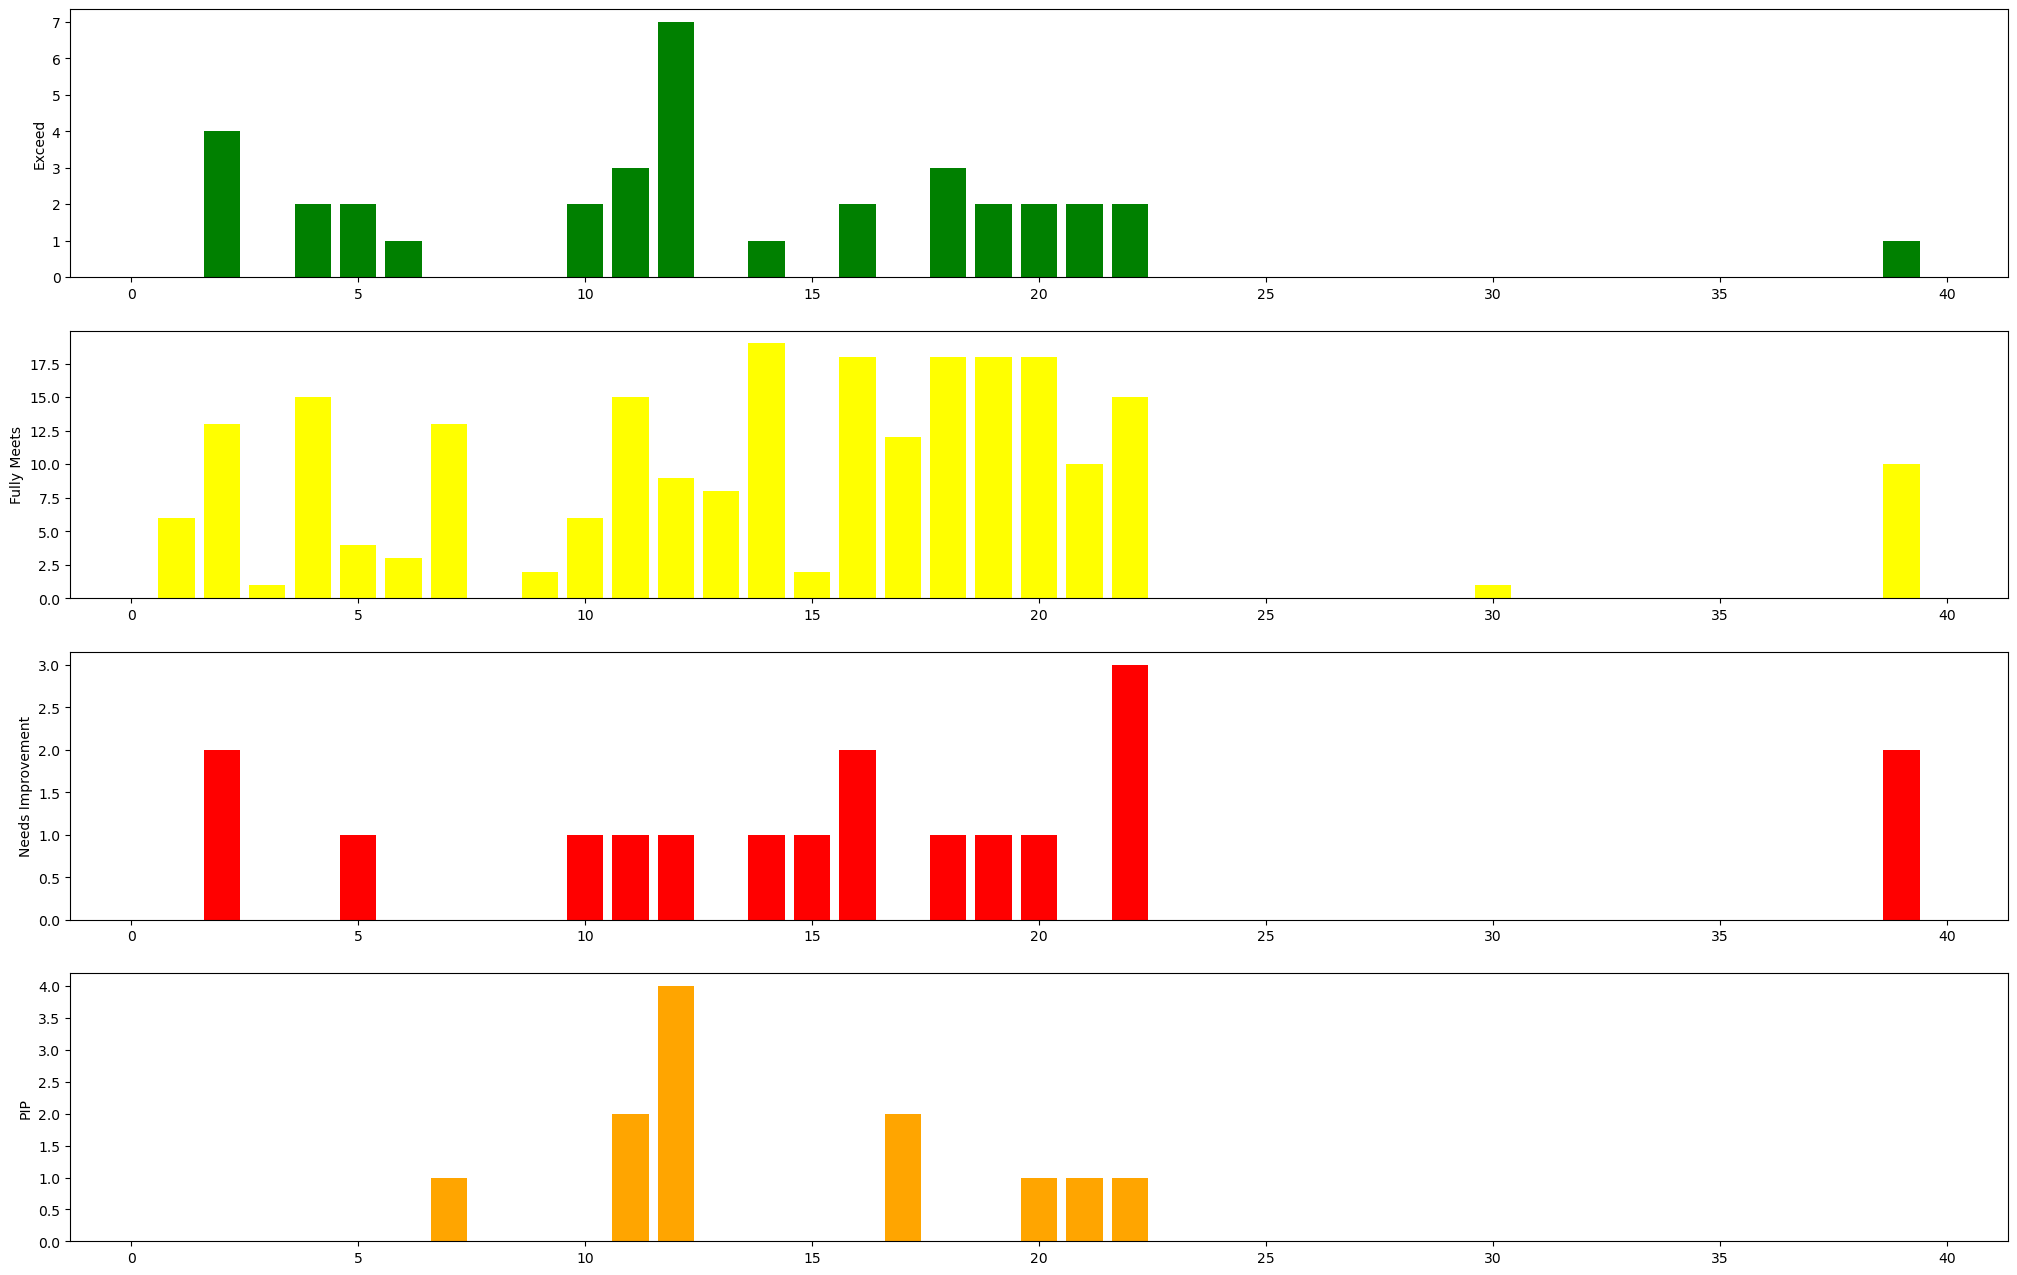

In [9]:
# plots
# prepare data
labels = performance_score_for_each_manager['ManagerID']
exceeds = performance_score_for_each_manager['Exceeds']
fully_meets = performance_score_for_each_manager['Fully Meets']
needs_improvement = performance_score_for_each_manager['Needs Improvement']
pip = performance_score_for_each_manager['PIP']

# figure
fig, ax = plt.subplots(4,1,figsize=(25,16))
ax[0].bar(labels, exceeds, color = 'green')
ax[0].set_ylabel('Exceed')
ax[1].bar(labels, fully_meets, color = 'yellow')
ax[1].set_ylabel('Fully Meets')
ax[2].bar(labels, needs_improvement, color = 'red')
ax[2].set_ylabel('Needs Improvement')
ax[3].bar(labels, pip, color = 'orange')
ax[3].set_ylabel('PIP')
plt.show()

### ANSWER
Zarówno na powyższym zestawieniu w danych tabelarycznych jak i na wykresie można zauważyć, że ocena pracownika jest w jakimś stopniu zależna od managera. Niemniej niezależnie od managera większość ocen pracownika jest 'fully meets'. Aby dokładniej określić zależności należało by się zastanowić ile osób ocenia dany manager oraz jak procentowo od ilości ocen przedstawiają się poszczególne oceny.

Niezależnie od managera zdecydowanie przeważa ocena "fully meets" gdzie występuję łącznie 236 takich ocen, druga w kolejności jest "exceeds" z 36 ocenami, chociaż tutaj przewaga nie jest aż tak zauważalna, a u niektórych managerów się nie pojawia. "Needs Improvement' pojawia się 18 razy, a aajrzadziej w zestawieniu pojawia się PIP, tylko 12 ocen.

## 2. Jakie źródła pozyskania pracownika (Recruitment Source) są najlepsze, jeśli zależy nam na jak najdłuższym stażu pracowników?

In [10]:
seniority = df[['DateofHire', 'DateofTermination', 'RecruitmentSource']]
display(seniority.head())
seniority['DateofHire'].info()

,DateofHire,DateofTermination,RecruitmentSource
0,10/27/2008,NaN,Diversity Job Fair
1,1/6/2014,NaN,Website Banner Ads
2,9/29/2014,NaN,Internet Search
3,2/16/2015,04/15/15,Pay Per Click - Google
4,5/1/2015,NaN,Website Banner Ads


<class 'pandas.core.series.Series'>
RangeIndex: 401 entries, 0 to 400
Series name: DateofHire
Non-Null Count  Dtype 
--------------  ----- 
310 non-null    object
dtypes: object(1)
memory usage: 3.3+ KB


In [11]:
# change data type and clean data
seniority['DateofHire'] = pd.to_datetime(seniority['DateofHire'])
seniority['DateofTermination'] = pd.to_datetime(seniority['DateofTermination'])
seniority['RecruitmentSource'].fillna('not know', inplace = True)
display(seniority.head())

/var/folders/dl/n6r7g5t96w30wn8vg3gb44640000gn/T/ipykernel_16262/590387683.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seniority['DateofHire'] = pd.to_datetime(seniority['DateofHire'])
/var/folders/dl/n6r7g5t96w30wn8vg3gb44640000gn/T/ipykernel_16262/590387683.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seniority['DateofTermination'] = pd.to_datetime(seniority['DateofTermination'])
/var/folders/dl/n6r7g5t96w30wn8vg3gb44640000gn/T/ipykernel_16262/590387683.py:4: SettingWithCopyWarning: 
A valu

,DateofHire,DateofTermination,RecruitmentSource
0,2008-10-27,NaT,Diversity Job Fair
1,2014-01-06,NaT,Website Banner Ads
2,2014-09-29,NaT,Internet Search
3,2015-02-16,2015-04-15,Pay Per Click - Google
4,2015-05-01,NaT,Website Banner Ads


In [12]:
# calculate seniority
def count_seniority(row):
    
    if pd.isnull(row['DateofTermination']):
        end_date = dt.datetime.now()
    else:
        end_date = row['DateofTermination']

    return (end_date - row['DateofHire'])/np.timedelta64(1,'Y')

In [13]:
seniority['Seniority'] = seniority.apply(lambda row: count_seniority(row), axis = 1)
seniority.head()

/var/folders/dl/n6r7g5t96w30wn8vg3gb44640000gn/T/ipykernel_16262/636401570.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seniority['Seniority'] = seniority.apply(lambda row: count_seniority(row), axis = 1)


,DateofHire,DateofTermination,RecruitmentSource,Seniority
0,2008-10-27,NaT,Diversity Job Fair,14.282540
1,2014-01-06,NaT,Website Banner Ads,9.088730
2,2014-09-29,NaT,Internet Search,8.360447
3,2015-02-16,2015-04-15,Pay Per Click - Google,0.158799
4,2015-05-01,NaT,Website Banner Ads,7.774535


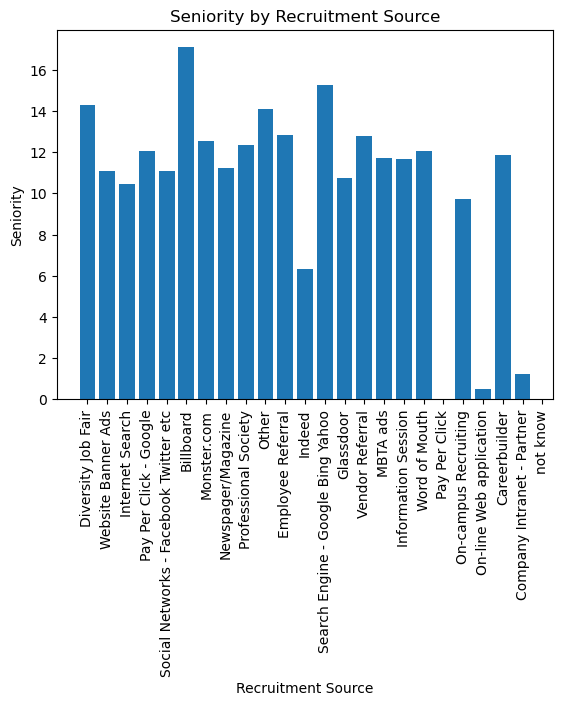

In [14]:
# plots
# prepare data
labels = seniority['RecruitmentSource']
seniority_values = seniority['Seniority']

# figure
plt.bar(labels, seniority_values)
 
plt.xlabel('Recruitment Source')
plt.ylabel('Seniority')
plt.title('Seniority by Recruitment Source')
plt.xticks(rotation = 90)

# Show graphic
plt.show();

### ANSWER
Najlepsza w pozyskiwaniu pracowników, którzy zostaną na dłużej wydaje się 'billboad', najmniej 'pay per click', o ile nie wkradł się błąd i dane z tego elementu nie powinny być powiązane z 'pay per click - google'.
Ponadto wysuwanie wniosków z tak pobieżnej analizy nie oddaje całego obrazu. Na staż zatrudnienia prawdopodobnie wpływają również inne czynniki, np. wiek pracownika, sytuacja życiowa. Zwykle młodsze osoby częściej zmieniają pracę niż starszę, z kolei kobieta w ciąży wykazać może długi staż, mimo, że nie "pracowała". Wiek potencjalnego pracownika również wpływa na sposób szukania pracy.

## 3. Czy stan cywilny (MartialDesc) pracownika koreluje w jakikolwiek sposób z zadowoleniem z pracy (EmpSatisfaction)?

In [15]:
martial_desc_vs_emp_satisfactions = df[['MaritalDesc', 'EmpSatisfaction']]
martial_desc_vs_emp_satisfactions.head()

,MaritalDesc,EmpSatisfaction
0,Married,2.0
1,Divorced,4.0
2,Single,5.0
3,Married,3.0
4,Single,3.0


In [16]:
display(martial_desc_vs_emp_satisfactions['MaritalDesc'].unique())

#remove 'nan' fields
martial_desc_vs_emp_satisfactions.dropna(inplace = True)
display(martial_desc_vs_emp_satisfactions['MaritalDesc'].unique())

array(['Married', 'Divorced', 'Single', 'Widowed', 'Separated', nan],
      dtype=object)

/var/folders/dl/n6r7g5t96w30wn8vg3gb44640000gn/T/ipykernel_16262/3195979863.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  martial_desc_vs_emp_satisfactions.dropna(inplace = True)


array(['Married', 'Divorced', 'Single', 'Widowed', 'Separated'],
      dtype=object)

In [17]:
martial_desc_vs_emp_satisfactions['EmpSatisfaction'].unique()

array([2., 4., 5., 3., 1.])

In [18]:
statistic_of_martial_desc_vs_emp_satisfactions = martial_desc_vs_emp_satisfactions.pivot_table(index = 'MaritalDesc', aggfunc = ('mean', 'max', 'min', 'std', 'median'))
statistic_of_martial_desc_vs_emp_satisfactions

EmpSatisfaction                                
                        max      mean median  min       std
MaritalDesc                                                
Divorced                5.0  4.033333    4.0  2.0  0.808717
Married                 5.0  3.747967    4.0  2.0  0.901670
Separated               5.0  3.833333    4.0  1.0  1.267304
Single                  5.0  3.970803    4.0  1.0  0.915083
Widowed                 5.0  4.250000    4.0  4.0  0.462910

In [19]:
married = martial_desc_vs_emp_satisfactions[martial_desc_vs_emp_satisfactions['MaritalDesc'] == 'Married']
divorced = martial_desc_vs_emp_satisfactions[martial_desc_vs_emp_satisfactions['MaritalDesc'] == 'Divorced']
single = martial_desc_vs_emp_satisfactions[martial_desc_vs_emp_satisfactions['MaritalDesc'] == 'Single']
widowed = martial_desc_vs_emp_satisfactions[martial_desc_vs_emp_satisfactions['MaritalDesc'] == 'Widowed']
separated = martial_desc_vs_emp_satisfactions[martial_desc_vs_emp_satisfactions['MaritalDesc'] == 'Separated']

<AxesSubplot: >

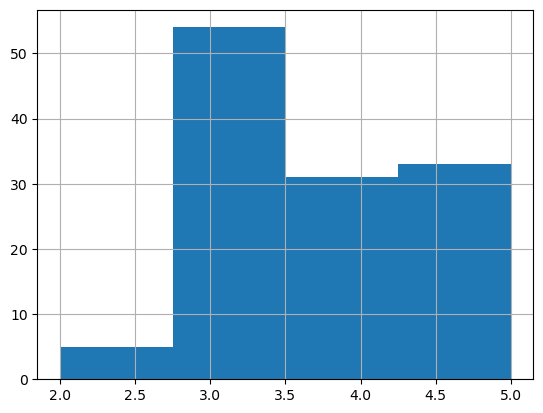

In [20]:
# prepared data for plot
married['EmpSatisfaction'].hist(bins=4)

<AxesSubplot: >

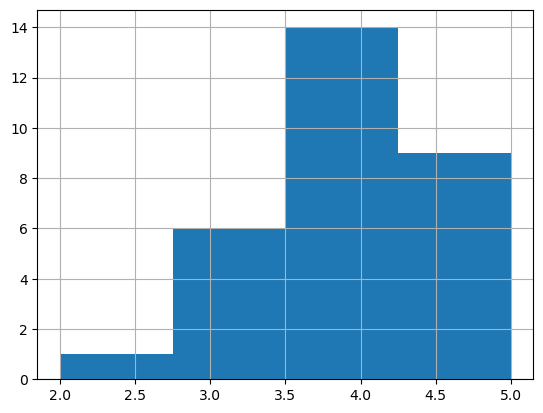

In [21]:
divorced['EmpSatisfaction'].hist(bins=4)

<AxesSubplot: >

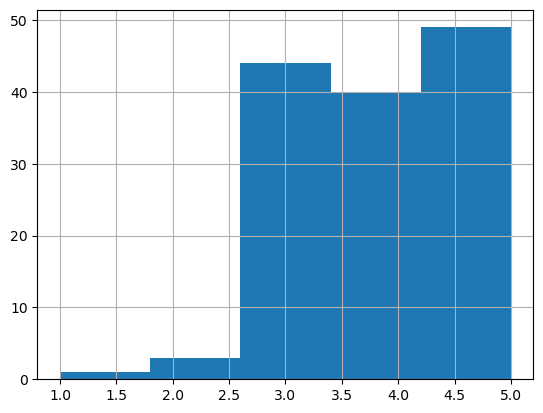

In [22]:
single['EmpSatisfaction'].hist(bins=5)

<AxesSubplot: >

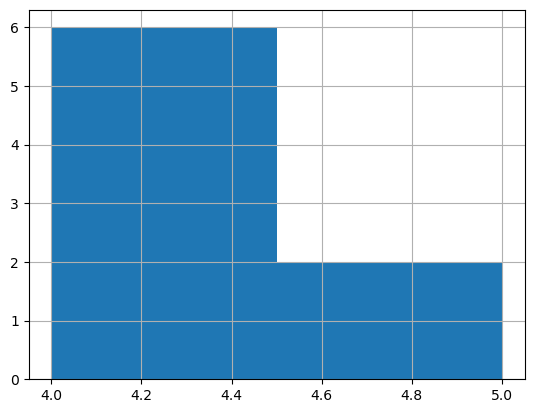

In [23]:
widowed['EmpSatisfaction'].hist(bins=2)

<AxesSubplot: >

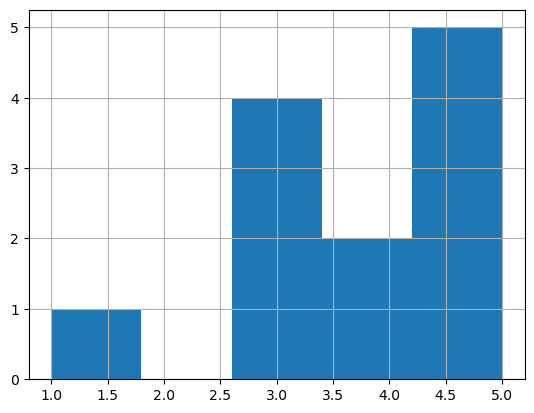

In [24]:
separated['EmpSatisfaction'].hist(bins=5)

In [25]:
statistic_of_martial_desc_vs_emp_satisfactions

EmpSatisfaction                                
                        max      mean median  min       std
MaritalDesc                                                
Divorced                5.0  4.033333    4.0  2.0  0.808717
Married                 5.0  3.747967    4.0  2.0  0.901670
Separated               5.0  3.833333    4.0  1.0  1.267304
Single                  5.0  3.970803    4.0  1.0  0.915083
Widowed                 5.0  4.250000    4.0  4.0  0.462910

In [28]:
list_of_unique_values = martial_desc_vs_emp_satisfactions['MaritalDesc'].unique()
data = pd.DataFrame()
for i in list_of_unique_values:
    item = martial_desc_vs_emp_satisfactions[martial_desc_vs_emp_satisfactions['MaritalDesc'] == i]
    item = item.groupby('EmpSatisfaction').count()
    item.rename(columns = {'MaritalDesc':i}, inplace = True)
    if len(data.index) == 0:
        data = item
        #display(data)
    else:
        data = pd.merge(data, item, how = 'outer', on = 'EmpSatisfaction')
        #display(data)
data = data.sort_values(by = ['EmpSatisfaction'])

# change nan to 0
data.fillna(0.0, inplace = True)
display(data)

,Married,Divorced,Single,Widowed,Separated
EmpSatisfaction,,,,,
1.0,0.0,0.0,1,0.0,1.0
2.0,5.0,1.0,3,0.0,0.0
3.0,54.0,6.0,44,0.0,4.0
4.0,31.0,14.0,40,6.0,2.0
5.0,33.0,9.0,49,2.0,5.0


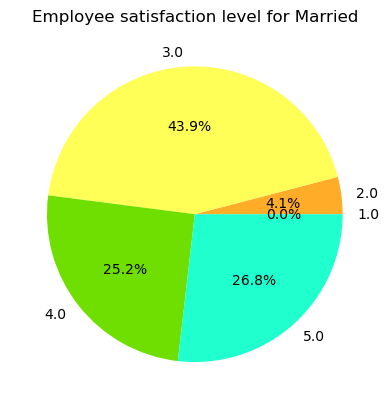

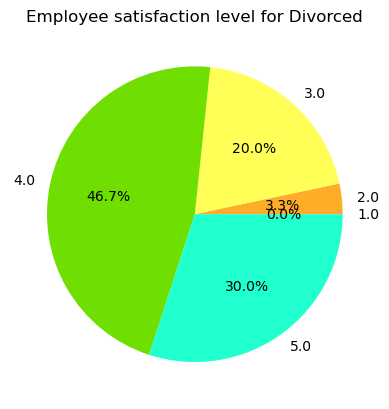

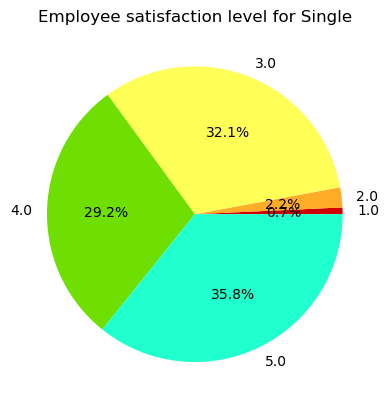

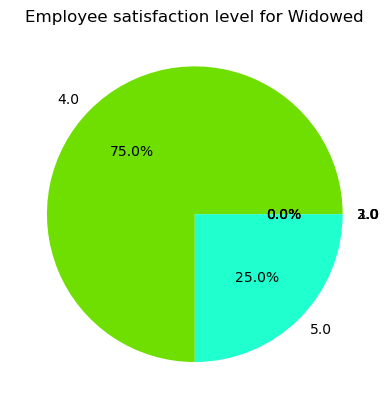

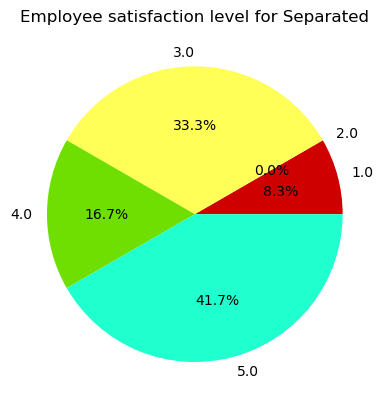

In [37]:
colors = ['#CF0000', '#FFAC28', '#FFFF58', '#6EDF00', '#20FFCE']
labels = data.index
for i in list_of_unique_values:
    values = data[i]
    plt.pie(values, labels = labels, colors = colors, autopct = '%1.1f%%')
    plt.title(f"Employee satisfaction level for {i}")
    plt.show()


In [39]:
display(data)
statistic_of_martial_desc_vs_emp_satisfactions

,Married,Divorced,Single,Widowed,Separated
EmpSatisfaction,,,,,
1.0,0.0,0.0,1,0.0,1.0
2.0,5.0,1.0,3,0.0,0.0
3.0,54.0,6.0,44,0.0,4.0
4.0,31.0,14.0,40,6.0,2.0
5.0,33.0,9.0,49,2.0,5.0


EmpSatisfaction                                
                        max      mean median  min       std
MaritalDesc                                                
Divorced                5.0  4.033333    4.0  2.0  0.808717
Married                 5.0  3.747967    4.0  2.0  0.901670
Separated               5.0  3.833333    4.0  1.0  1.267304
Single                  5.0  3.970803    4.0  1.0  0.915083
Widowed                 5.0  4.250000    4.0  4.0  0.462910

### ANSWER
Nie można jasno ocenić korelacji między stanem cywilnym a zadowoleniem z pracy. We wszystkich grupach mediana oceny zadowolenia przypadała na 4.0, co oznacza, że nie zależnie od stanu cywilnego przynajmniej połowa osób jest raczej zadowolona z pracy. Średnia wartość jest różna i mieści się od 3.75 (małżeństwa) do 4.25 (wdowcy), jest więc bliska medianie. Wśród najmniejszego zadowolenia wyróżnić można wdowców, ponieważ nie ma wśród nich osób niezadowlonych z pracy, jednak patrząc globalnie jest ich mało (tylko 8 osób) by określić to jednoznacznie. Maksymalne zadowolenie pojawia się w każdej z grup i stanowi 26.8% dla małżeństw, 30% dla rozwodników, 35.8% dla singli, 25% dla wdowców oraz 41.7% dla ludzi w separacji. Opierając się tylko jednak na tych danych można mieć przekłamany obraz zadowolenia z pracy w zależności stanu cywilnego. Ponadto, na zadowolenie w pracy wpływa ogólne zadowolenie, a tutaj pojawia się wiele czyników, które na taką ocenę wpływają. Moim zdaniem nie można ocenić jednoznacznie takiej korelacji.

## 4. Jak wygląda struktura wieku aktualnie zatrudnionych pracowników?

In [49]:
# zakładam, że 'DOB' = date of birthday
age_structure = df['DOB'].to_frame()
display(age_structure)

,DOB
0,11/24/87
1,04/26/84
2,09/01/86
3,09/16/85
4,05/19/88
...,...
396,NaN
397,NaN
398,NaN
399,NaN


In [56]:
# usuwamy NaN
age_structure.dropna(inplace = True)
display(age_structure.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 0 to 309
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DOB     310 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 4.8 KB


None

In [57]:
# change data type to datatime
age_structure['DOB'] = pd.to_datetime(age_structure['DOB'])
display(age_structure.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 0 to 309
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DOB     310 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 4.8 KB


None

In [96]:
# def funcion to calculate age
def count_age(row):
    now = dt.datetime.now()
    if now < row['DOB']:
        #print(f"Wrong DOB birthday {row['DOB']} now {now}")
        return 0
    return math.floor((now - row['DOB'])/np.timedelta64(1,'Y'))

In [97]:
age_structure['Age'] = age_structure.apply(lambda row: count_age(row), axis = 1)
age_structure.head()

,DOB,Age
0,1987-11-24,35
1,1984-04-26,38
2,1986-09-01,36
3,1985-09-16,37
4,1988-05-19,34


<AxesSubplot: >

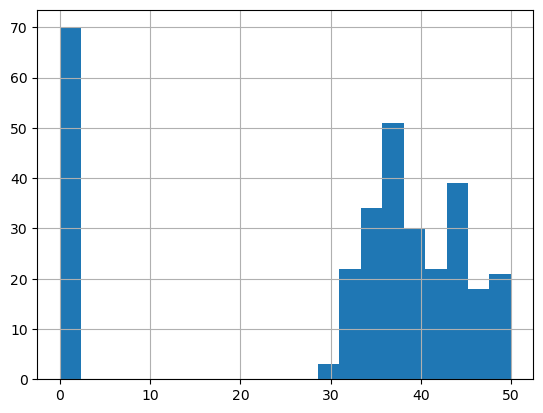

In [103]:
age_structure['Age'].hist(bins = 21)

In [104]:
age_structure_without_wrong_DOB = age_structure[age_structure['Age'] != 0.0]
age_structure_without_wrong_DOB

,DOB,Age
0,1987-11-24,35
1,1984-04-26,38
2,1986-09-01,36
3,1985-09-16,37
4,1988-05-19,34
...,...,...
302,1986-06-06,36
304,1973-05-27,49
306,1986-04-23,36
307,1983-02-09,39


<AxesSubplot: >

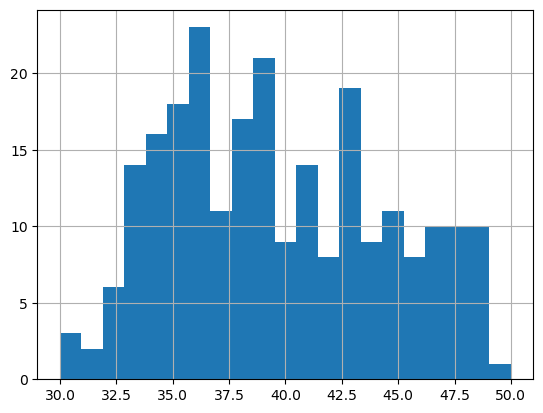

In [105]:
age_structure_without_wrong_DOB['Age'].hist(bins = 21)

mean = 39.65, median = 39.0


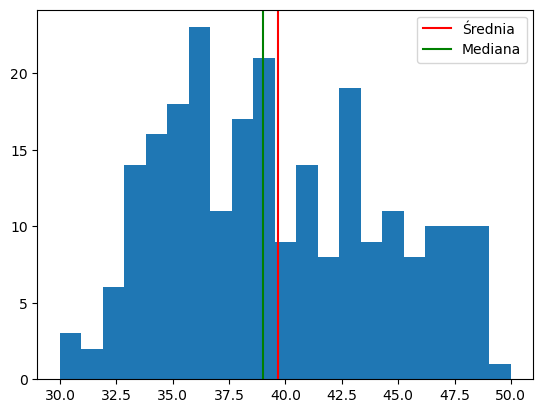

In [107]:
age_values = age_structure_without_wrong_DOB['Age'].to_numpy()
mean_age = np.mean(age_structure_without_wrong_DOB['Age'])
median_age = np.median(age_structure_without_wrong_DOB['Age'])

print(f"mean = {mean_age}, median = {median_age}")
plt.hist(age_values, bins = 21)
plt.axvline(x = mean_age, color='red', label = 'Średnia')
plt.axvline(x = median_age, color='green', label = 'Mediana')
plt.legend(loc='upper right')
plt.show()

In [102]:
age_structure_without_wrong_DOB.describe()

,Age
count,240.000000
mean,39.650000
std,5.030701
min,30.000000
25%,36.000000
50%,39.000000
75%,43.000000
max,50.000000


### ANSWER
Struktura wieku pracowników przedstawia się jak na załączonych powyżej histogramach oraz tabeli opisującej. Do szerszej analizy wzięto tylko poprawnie wypełnioną datę. Średni wiek pracownika to niecałe 40 lat, najmłodszy ma 30 lat, najstarszy ukończył 50 lat. 50% pracowników ma do 39 lat. Osoby do 36 roku życia stanowią 25% pracowników, podobnie jak osoby powyżej 43 roku życia. Analizując taką statystykę, można przyjąć, że większość pracowników to osoby między 35 a 45 rokiem życia.

## 5. Czy starsi pracownicy pracują nad większą liczbą specjalnych projektów niż młodsi pracownicy?

In [111]:
# zakładam, podobnie jak wyżej, że 'DOB' = date of birthday
special_project_by_age = df[['DOB', 'SpecialProjectsCount']]
special_project_by_age

,DOB,SpecialProjectsCount
0,11/24/87,6.0
1,04/26/84,4.0
2,09/01/86,5.0
3,09/16/85,4.0
4,05/19/88,5.0
...,...,...
396,NaN,NaN
397,NaN,NaN
398,NaN,NaN
399,NaN,NaN


In [115]:
# usuwam NaN i zmieniam typ danych 
special_project_by_age.dropna(inplace = True)
special_project_by_age['DOB'] = pd.to_datetime(special_project_by_age['DOB'])

/var/folders/dl/n6r7g5t96w30wn8vg3gb44640000gn/T/ipykernel_16262/819757280.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  special_project_by_age.dropna(inplace = True)
/var/folders/dl/n6r7g5t96w30wn8vg3gb44640000gn/T/ipykernel_16262/819757280.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  special_project_by_age['DOB'] = pd.to_datetime(special_project_by_age['DOB'])


In [116]:
# obliczam wiek pracownika, oraz usuwam tych z podaną złą datą urodzenia
special_project_by_age['Age'] = special_project_by_age.apply(lambda row: count_age(row), axis = 1)
special_project_by_age = special_project_by_age[special_project_by_age['Age'] != 0.0]
special_project_by_age

/var/folders/dl/n6r7g5t96w30wn8vg3gb44640000gn/T/ipykernel_16262/3441594012.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  special_project_by_age['Age'] = special_project_by_age.apply(lambda row: count_age(row), axis = 1)


,DOB,SpecialProjectsCount,Age
0,1987-11-24,6.0,35
1,1984-04-26,4.0,38
2,1986-09-01,5.0,36
3,1985-09-16,4.0,37
4,1988-05-19,5.0,34
...,...,...,...
302,1986-06-06,6.0,36
304,1973-05-27,7.0,49
306,1986-04-23,6.0,36
307,1983-02-09,5.0,39


In [120]:
special_project_by_age_analysis = special_project_by_age.pivot_table(index = 'Age', aggfunc = ('mean', 'max', 'min', 'std', 'median'))
special_project_by_age_analysis

/var/folders/dl/n6r7g5t96w30wn8vg3gb44640000gn/T/ipykernel_16262/149923419.py:1: FutureWarning: ['DOB'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  special_project_by_age_analysis = special_project_by_age.pivot_table(index = 'Age', aggfunc = ('mean', 'max', 'min', 'std', 'median'))


SpecialProjectsCount                                
                     max      mean median  min       std
Age                                                     
30                   0.0  0.000000    0.0  0.0  0.000000
31                   0.0  0.000000    0.0  0.0  0.000000
32                   0.0  0.000000    0.0  0.0  0.000000
33                   7.0  0.857143    0.0  0.0  2.213843
34                   6.0  1.625000    0.0  0.0  2.500000
35                   7.0  3.166667    4.0  0.0  2.770644
36                   7.0  2.260870    0.0  0.0  2.911067
37                   6.0  0.909091    0.0  0.0  2.071451
38                   7.0  1.294118    0.0  0.0  2.468925
39                   7.0  1.000000    0.0  0.0  2.167948
40                   0.0  0.000000    0.0  0.0  0.000000
41                   7.0  1.714286    0.0  0.0  2.840059
42                   6.0  1.375000    0.0  0.0  2.559994
43                   6.0  1.631579    0.0  0.0  2.361980
44                   8.0  0.888889    0.0  0.0  2.666667
45                   0.0  0.000000    0.0  0.0  0.000000
46                   0.0  0.000000    0.0  0.0  0.000000
47                   6.0  0.600000    0.0  0.0  1.897367
48                   0.0  0.000000    0.0  0.0  0.000000
49                   7.0  1.900000    0.0  0.0  3.107339
50                   0.0  0.000000    0.0  0.0       NaN

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


x = Int64Index([30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
            47, 48, 49, 50],
           dtype='int64', name='Age') 
y = [0.         0.         0.         0.85714286 1.625      3.16666667
 2.26086957 0.90909091 1.29411765 1.         0.         1.71428571
 1.375      1.63157895 0.88888889 0.         0.         0.6
 0.         1.9        0.        ]


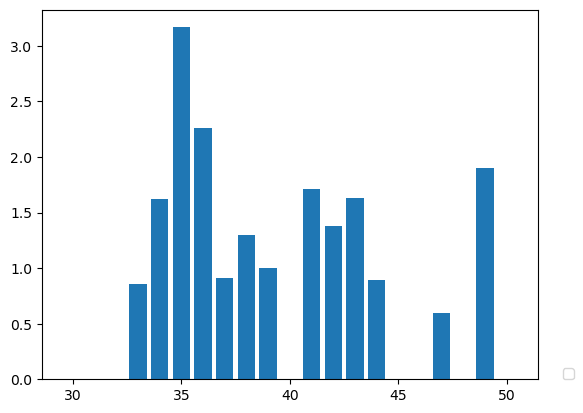

In [128]:
x = special_project_by_age_analysis.index
y = special_project_by_age_analysis[('SpecialProjectsCount', 'mean')].to_numpy()
print(f"x = {x} \ny = {y}")

fig, ax = plt.subplots()
ax.bar(x, y)
ax.legend(loc = (1.05, 0.0))
plt.show()

### ANSERW
Nie można jednoznacznie stwierdzić czy wiek wpływa na otrzymanie specjalnych projektów. Średnio najwięcej takich projektów dostają 35 latkowie. Więc odpiedź jest nie, nie ma zależności, że starsi pracownicy mają więcje projektów specjalnych.